In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [35]:
import pandas as pd

In [36]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')


In [37]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [38]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.shape

(10000, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [41]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [44]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [45]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [46]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"],axis=1,inplace=True)


In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True, dtype=int)


In [49]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  int64  
 10  Geography_Spain    10000 non-null  int64  
 11  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [51]:
print(df[["Geography_Germany", "Geography_Spain", "Gender_Male"]].head())


   Geography_Germany  Geography_Spain  Gender_Male
0                  0                0            0
1                  0                1            0
2                  0                0            0
3                  0                0            0
4                  0                1            0


**[scaling the numbers](http://)*#  **

In [52]:
x=df.drop(columns=["Exited"])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [53]:
y=df["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(8000, 11)
(2000, 11)
(2000,)
(8000,)


In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [80]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [68]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [69]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model=Sequential()
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss="binary_crossentropy",optimizer="Adam")

In [74]:
model.fit(x_train_scaled, y_train, epochs=10)  # ✅ correct


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - loss: 0.6012
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.5205
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.4814
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 0.4542
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.4481
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.4506
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.4350
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - loss: 0.4390
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.4311
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.4421


In [78]:
model.layers[0].get_weights()

[array([[-0.0470318 ,  0.18271634, -0.04755542],
        [-2.012699  , -1.173255  , -2.2229495 ],
        [ 0.18244416, -0.09896262,  0.17605019],
        [-0.11808228, -0.4548142 , -0.1513313 ],
        [ 0.21156958,  0.02179618,  0.07700919],
        [ 0.05098   ,  0.11005159,  0.00822603],
        [ 0.36245495,  1.0431386 ,  0.07717232],
        [ 0.18554057, -0.11669432, -0.07726296],
        [-0.6236275 , -0.3722444 , -0.7040344 ],
        [-0.23550932,  0.18881042,  0.0310434 ],
        [ 0.3445696 ,  0.42916545,  0.430135  ]], dtype=float32),
 array([0.07448812, 0.315096  , 0.05814084], dtype=float32)]

In [81]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


we have to convert it into 0,1

In [85]:
y_pred=np.where(y_log>0.5,1,0)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

for improve accuracy

In [88]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - loss: 0.4256
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.4197
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.4220
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.4236
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.4298
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 0.4245
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 0.4239
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.4185
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 0.4205
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.4203


In [104]:
model=Sequential()
model.add(Dense(11,activation="sigmoid",input_dim=11))
model.add(Dense(11,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [106]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.5134 - val_accuracy: 0.7975 - val_loss: 0.4901
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8046 - loss: 0.4725 - val_accuracy: 0.7975 - val_loss: 0.4674
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7952 - loss: 0.4633 - val_accuracy: 0.7975 - val_loss: 0.4491
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7872 - loss: 0.4541 - val_accuracy: 0.8006 - val_loss: 0.4385
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8099 - loss: 0.4219 - val_accuracy: 0.8087 - val_loss: 0.4339
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8168 - loss: 0.4240 - val_accuracy: 0.8131 - val_loss: 0.4314
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8173 - loss: 0.4233 - val_accuracy: 0.8119 - val_loss: 0.4298
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8153 - loss: 0.4224 - val_accu

In [107]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830 (3.25 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 554 (2.17 KB)

In [108]:
import matplotlib.pyplot as plt

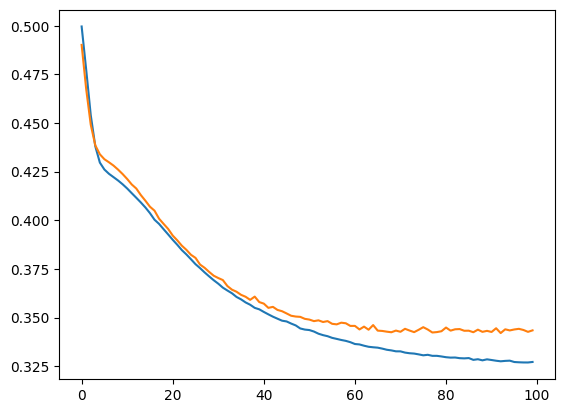

In [109]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])


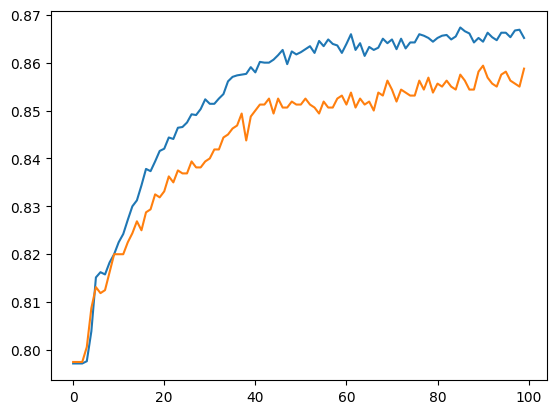

In [110]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
